# Demand Forcasting Retail

## Part 2 - ARIMA Baseline Model
___

### Import dependencies and data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [27]:
# Load the dataset (assuming 'Date' column exists and is in proper datetime format)
main_df = pd.read_csv('data/processed/train.csv')
test_df = pd.read_csv('data/processed/test.csv')

In [28]:
main_df.head()

,Weekly_Sales,IsHoliday,Year,Month,DayOfWeek,Store_2,Store_3,Store_4,Store_5,Store_6,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,0.006313,0,1.0,0.545455,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.031216,0,0.5,0.090909,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.079688,0,0.0,0.090909,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.039018,0,0.5,0.000000,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.008014,0,0.5,0.363636,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Select the target variable (Weekly Sales)
train_series = main_df['Weekly_Sales']
test_series = test_df['Weekly_Sales']

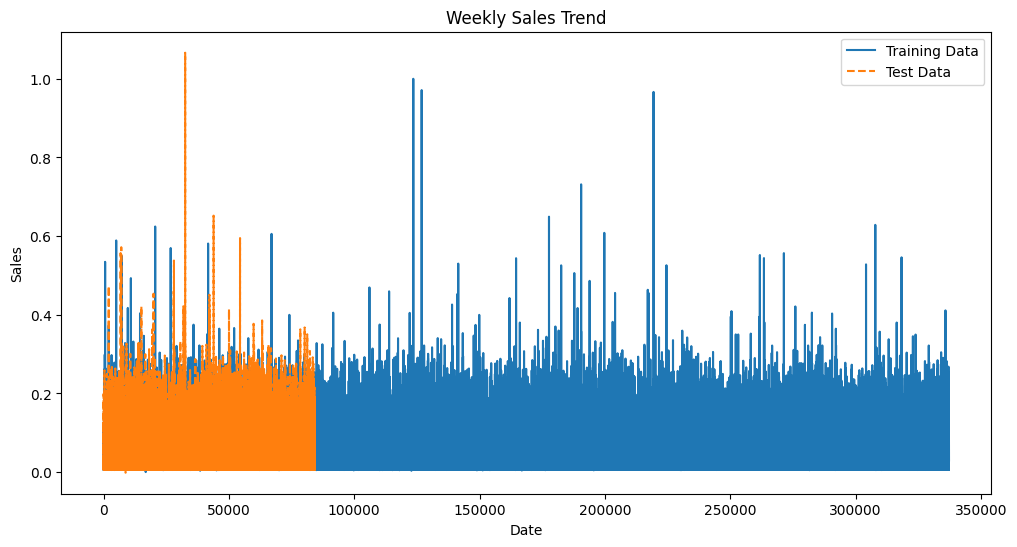

In [33]:
# Visualize the sales trend
plt.figure(figsize=(12, 6))
plt.plot(train_series, label='Training Data')
plt.plot(test_series, label='Test Data', linestyle='dashed')
plt.legend()
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [34]:
# Define ARIMA model (p=2, d=1, q=2 as initial choice, tune as needed)
model = ARIMA(train_series, order=(2,1,2))
model_fit = model.fit()


In [35]:
# Forecasting
forecast = model_fit.forecast(steps=len(test_series))


In [36]:
# Evaluate performance
mae = mean_absolute_error(test_series, forecast)
mse = mean_squared_error(test_series, forecast)
rmse = np.sqrt(mse)
print(f'MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}')

MAE: 0.0231, MSE: 0.0012, RMSE: 0.0345


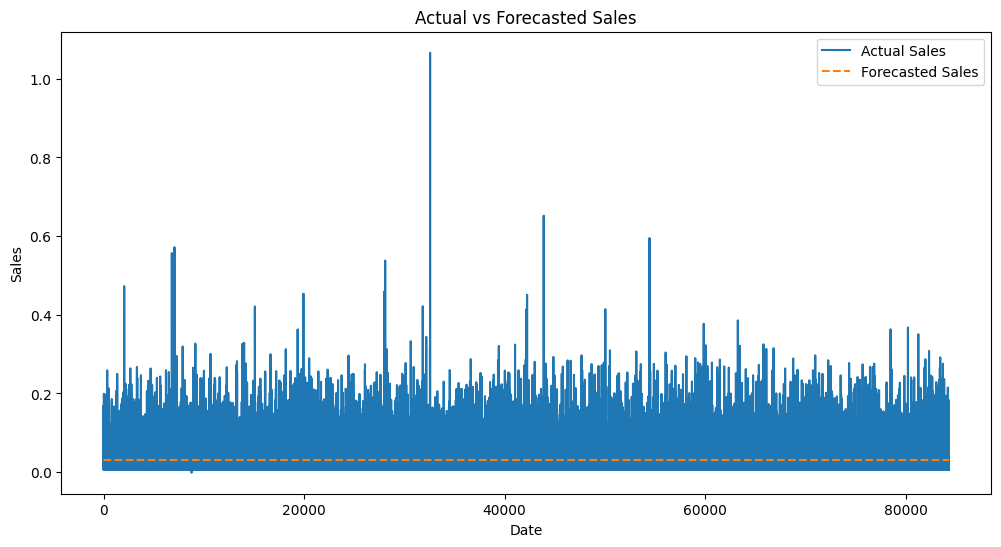

In [37]:
# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_series, label='Actual Sales')
plt.plot(test_series.index, forecast, label='Forecasted Sales', linestyle='dashed')
plt.legend()
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()